# NLP Project
- We would utilize data from GitHub README files to analyze and predict programming language based on the content.


# Project Goal:
- The goal is to analyze and develop a model capable of predicting the primary programming language of a repository based on its content and structure. This will enable efficient categorization and organization of code repositories, aiding developers in discovering relevant projects and facilitating collaboration within the programming community.

In [1]:
#df stuff
import pandas as pd
import numpy as np


#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from IPython.display import Image

#play with words
import nltk.sentiment
import nltk
import re
from pprint import pprint

#split and model
from scipy.stats import f_oneway
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import ToktokTokenizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#import 
from sklearn.feature_extraction.text import CountVectorizer

#sql creds
import env as e
import acquire as a
import wrangle as w
import explore as ex
import modeling as m

#scraping
import requests
from bs4 import BeautifulSoup

#shortcuts imports
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username

#ignore warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# Data Dictionary:


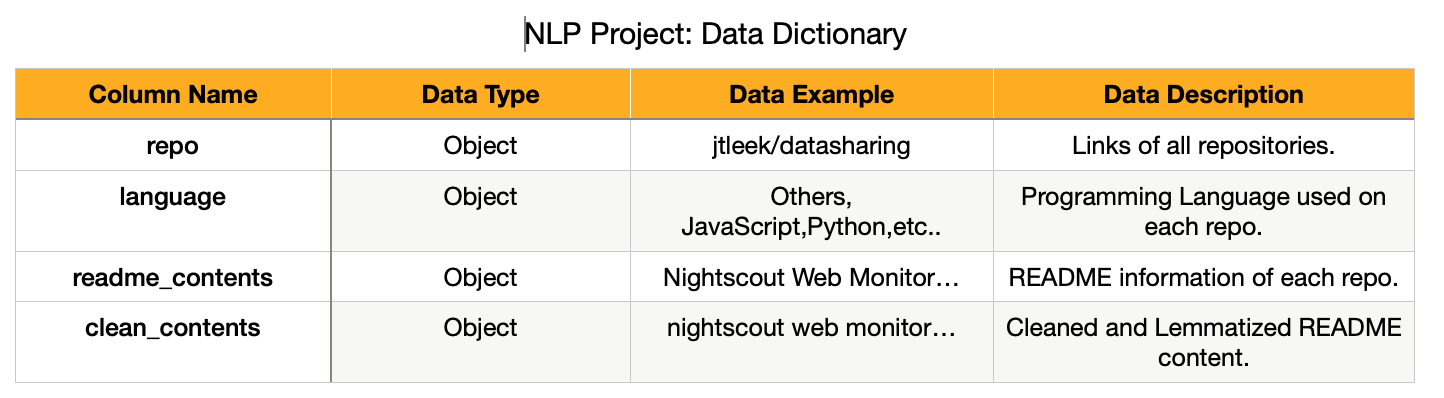

In [2]:
#load Data Dictionary
Image(filename='data dictionary.png')

# Wrangle
- Acquire:
    - Acquired the data from github.com by extracting the ["Most Forked Repositories"]([https://www.kaggle.com/datasets/meirnizri/covid19-dataset](https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories))
    - Data was collected as of June 27, 2023.
    - Data was scraped and a JSON file was created (data2.json).
    - Data Contains 180 repositories.
- Prepare:
  - Removed non-ASCII characters and converted all characters to lowercase.
  - Removed stopwords, tokenized, and lemmatized rows.
  - Created a new column with cleaned and lemmatized README content.
  - Created a bucket named 'other' to include all other languages that are not JavaScript, Python,Java, TypeScript, or     HTML.
  - Deleted extra words that were not relevant to the project
  - Split the data into train, validation, and test sets for exploration.

In [3]:
# Use wrangle function to acquire and prepare data
df = w.nlp_wrangle()
df.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,0.9371,491,65
1,github/gitignore,Other,# A collection of `.gitignore` templates\n\nTh...,collection gitignore template collection giti...,0.9991,4526,610
2,Pierian-Data/Complete-Python-3-Bootcamp,Other,# Complete-Python-3-Bootcamp\nCourse Files for...,plete python bootcamp course file plete pytho...,0.4404,163,23
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href getbootstrap img src ge...,0.9943,9366,1288
4,rdpeng/ExData_Plotting1,Other,## Introduction\n\nThis assignment uses data f...,introduction assignment us data href archive ...,0.9903,2891,436


# Exploration
- Created visualizations and answered the following questions:
1. Are there any significant differences in the word frequencies between README files of different programming             languages?
2. Does the presence of specific libraries in the README file correlate with the programming language used?
3. What are the most common words throughout the data frame and  per each language?
4. What are the least common words throughout the data frame and  per each language?
5. Is message length significant in identifying language category?

### Establish baseline accuracy

In [4]:
# Divide mode(Other) by total
82/174

0.47126436781609193

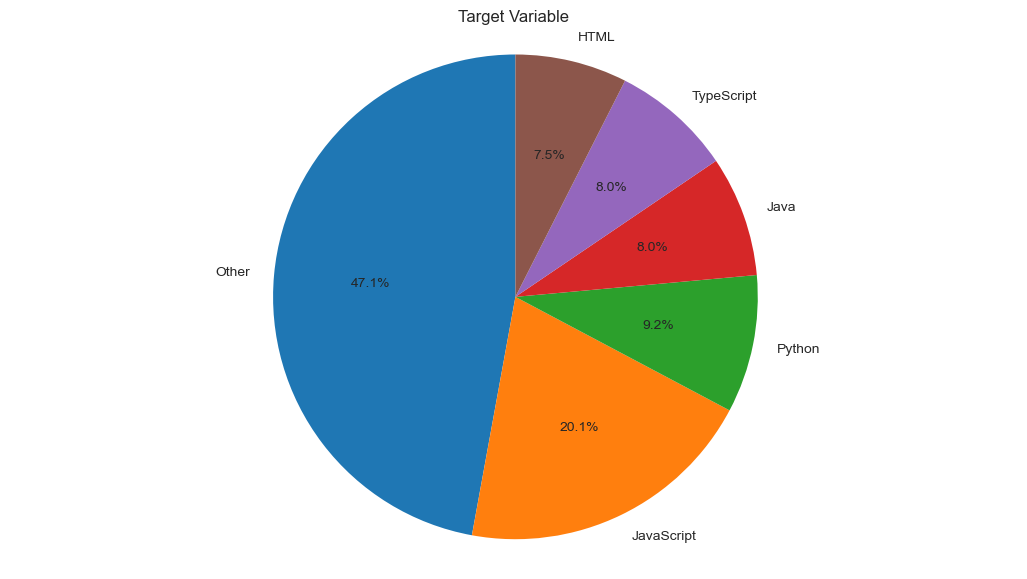

In [5]:
# Visualize Target
ex.create_pie_chart(df,'language','Target Variable')

- Split data into train, validate and test

In [6]:
# Split data into train, validate and test using function
train, validate, test = ex.split_data(df, 'language')


## 1.Are there any significant differences in the word frequencies between README files of different programming languages?

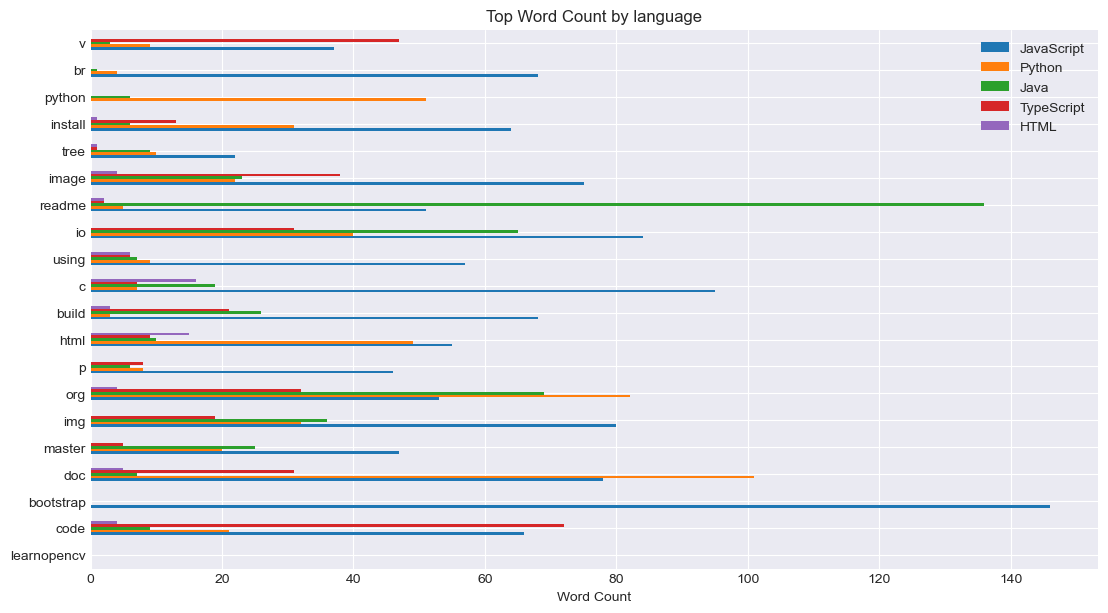

,JavaScript,Python,Java,TypeScript,HTML,Other,All
j,165,3,2,12,2,20,204
bootstrap,146,0,0,0,0,340,486
c,95,7,19,7,16,220,364
next,86,2,2,63,1,7,161
project,86,9,20,34,14,74,237


In [7]:
# Run function that runs the code for Question #1.
ex.question_1(train)

### Insight:
- Javascript contains img, bootstrap, c significantly more than other language categories. 
- Python contains python and doc significantly more than other language categories.
- Java contains readme significantly more than other language categories. 
- TypeScript and Javascript use the word code significantly more than other language categories.
- HTML seems to share most words with other language categories.

# 2. Does the presence of specific libraries in the README file correlate with the programming language used? ie. Pandas, dubbo, nbsp

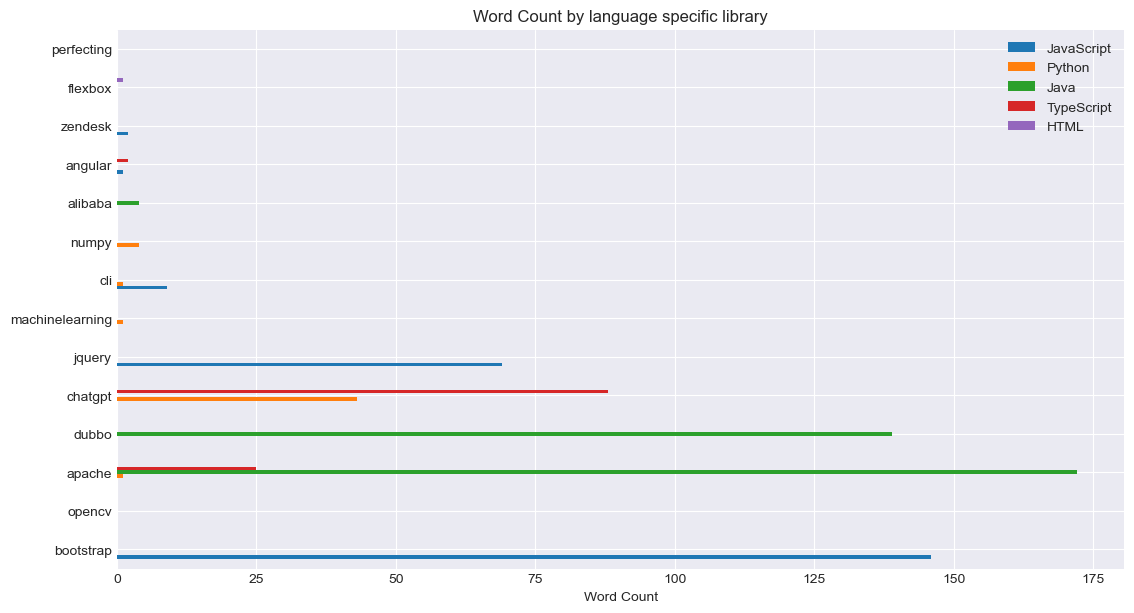

,JavaScript,Python,Java,TypeScript,HTML,Other,All,tools_frameworks
j,165,3,2,12,2,20,204,0
bootstrap,146,0,0,0,0,340,486,486
c,95,7,19,7,16,220,364,0
next,86,2,2,63,1,7,161,0
project,86,9,20,34,14,74,237,0


In [8]:
# Run function that runs code for Question #2
ex.question_2(train)

### Insight:
- Java uses dubbo and apache more than the rest of the languages
- JavaScript uses bootstrap and jquery more than the rest of the languages
- TypeScript uses chatgpt more than the other languages

# 3. Most Common words on entire df and/or each language


In [9]:
# Run function that runs code for Question #3.
ex.question_3(train)

JavaScript              j
Python              panda
Java               apache
TypeScript        chatgpt
HTML                 file
Other         learnopencv
All           learnopencv
Total         learnopencv
dtype: object


### Insight:
- Top 5 most common words are j, panda, apache, chatgpt and learnopencv.

# 4. Least common words used on entire df and/or each language

In [10]:
# Run function that runs code for Question #4.
ex.question_4(train)

JavaScript        panda
Python        bootstrap
Java          bootstrap
TypeScript    bootstrap
HTML          bootstrap
Other              gulp
All             generic
Total           generic
dtype: object


### Insight:
- Top 5 least common words are: panda, bootstrap, gulp, generic and panda.

# 5. Is message length significant in identifying language category?

## Stats Test

$H_{0}$ : There is no difference in word count as they apply to language category

$H_{a}$ : There is a difference in word count as they apply to language category

F-value: 0.7584699880034976
p-value: 0.5819111925535887


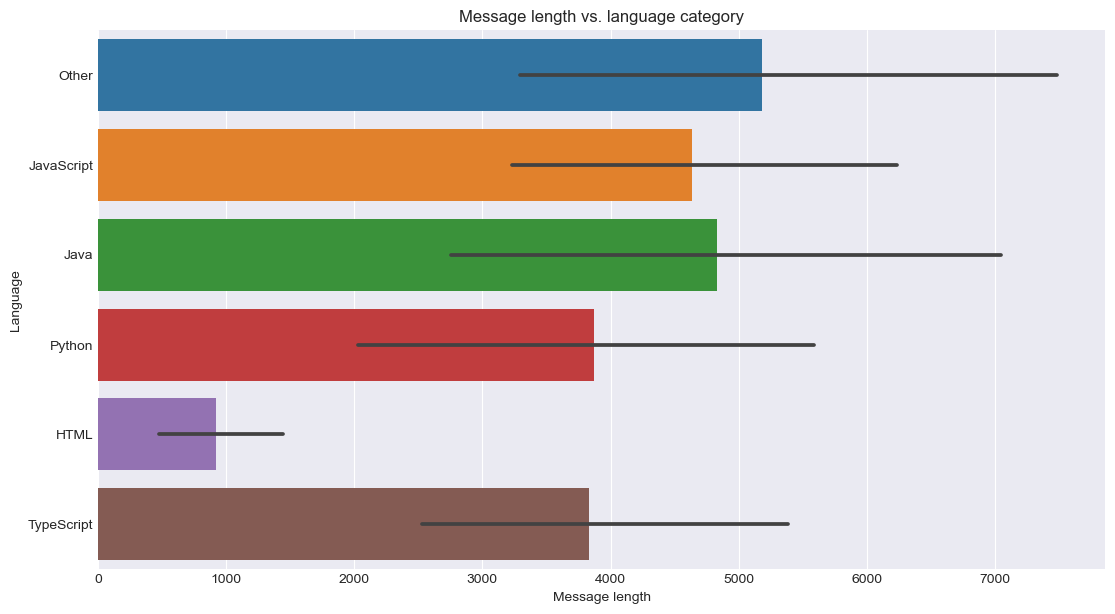

In [11]:
# Run function that visualizes message length vs. language category. 
# The code also prepares variables for and runs ANOVA stats test and prints out the f and p values
# Alpha is set to 0.05
ex.stats_ANOVA_viz(train)

### Insight:
-  The p-value of the ANOVA test is greater than alpha. We fail to reject the null hypothesis and we can infer that the word count doesn't identify language category. .

# Word Clouds

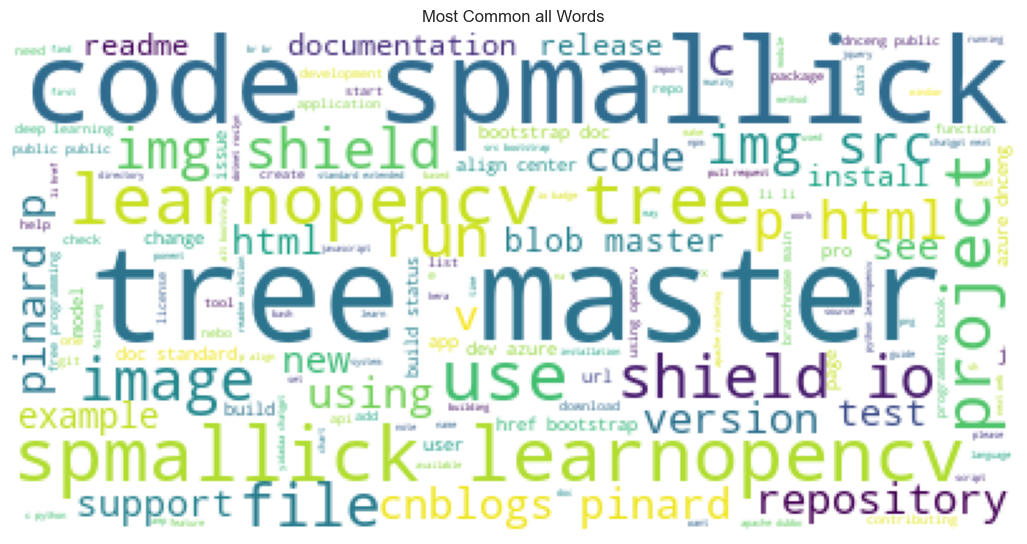

In [12]:
# Run function for word cloud
ex.word_cloud_all(train)

### Insight:
- The word cloud looks neat and is fun to make, however, it is very difficult to obtain any useful information from it. 

# Sentiment analysis

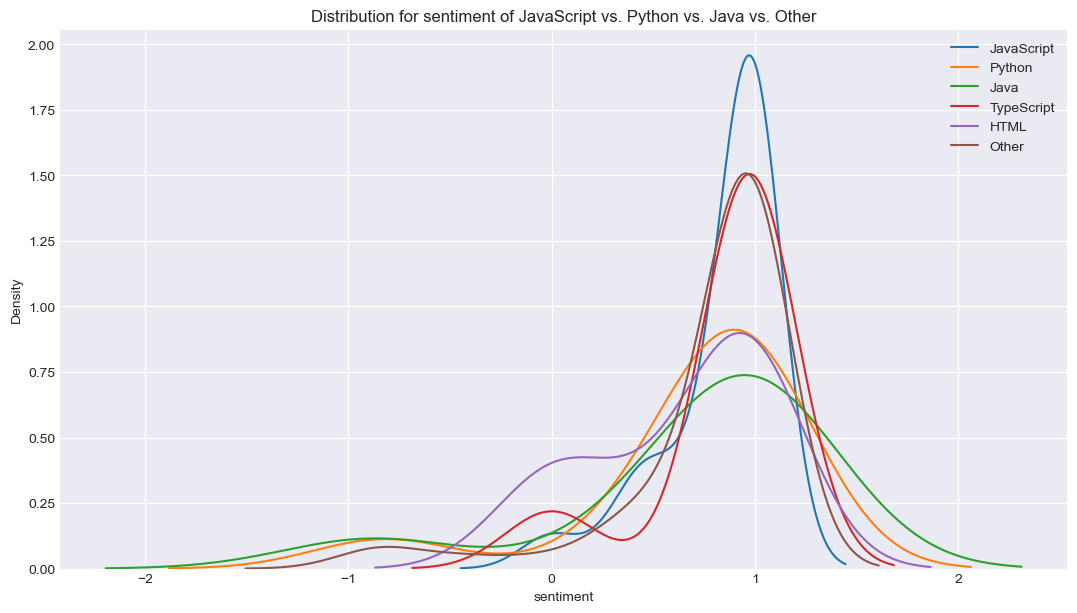

,mean,median
language,,
HTML,0.649487,0.92355
Java,0.689600,0.99135
JavaScript,0.836390,0.99080
Other,0.773155,0.97760
Python,0.695150,0.91865
TypeScript,0.851513,0.98315


In [13]:
# Run function for sentiment analysis and print figures and graph
ex.sentiment(train)

### Insight:
- Through sentiment analysis, we have determined that most 'readme' files are written with a positive tone. HTML and TypeScript have the most use of 'neutral' words and Java/Python have the most use of 'negative' words.

## Exploration Summary:
- JavaScript 'img', 'bootstrap', 'c' are significantly more prevalent in the language categories compared to other languages.
- Python shows a higher occurrence of 'python' and 'doc' compared to other language categories.
- Java stands out with a significantly higher usage of 'readme' compared to other language categories.
- TypeScript and JavaScript have a notable preference for the word 'code' compared to other language categories.
- HTML shares the most common words with other language categories, indicating a more balanced distribution.
- Java utilizes "dubbo" and "apache" more frequently than the other languages.
- JavaScript has a higher usage of "bootstrap" and "jquery" compared to the other languages.
- TypeScript shows a higher occurrence of "chatgpt" compared to the other languages.
- The ANOVA test results indicate that the word count does not effectively identify language categories, and thus the null hypothesis cannot be rejected.
- The word cloud looks neat and is fun to make, however, it is very difficult to obtain any useful information from it.

# Modeling
- split data into X_train, X_validate, X_test, y_train, y_validate, y_test
    - make 'bag of words' for modeling
- Prediction metric used: Accuracy.
- Baseline of 47.1%

In [14]:
# Run function that prepares data for modeling
X_bow, X_validate_bow, X_test_bow, y_train, y_validate, y_test = m.prepare_for_modeling(train, validate, test)

## Decision tree

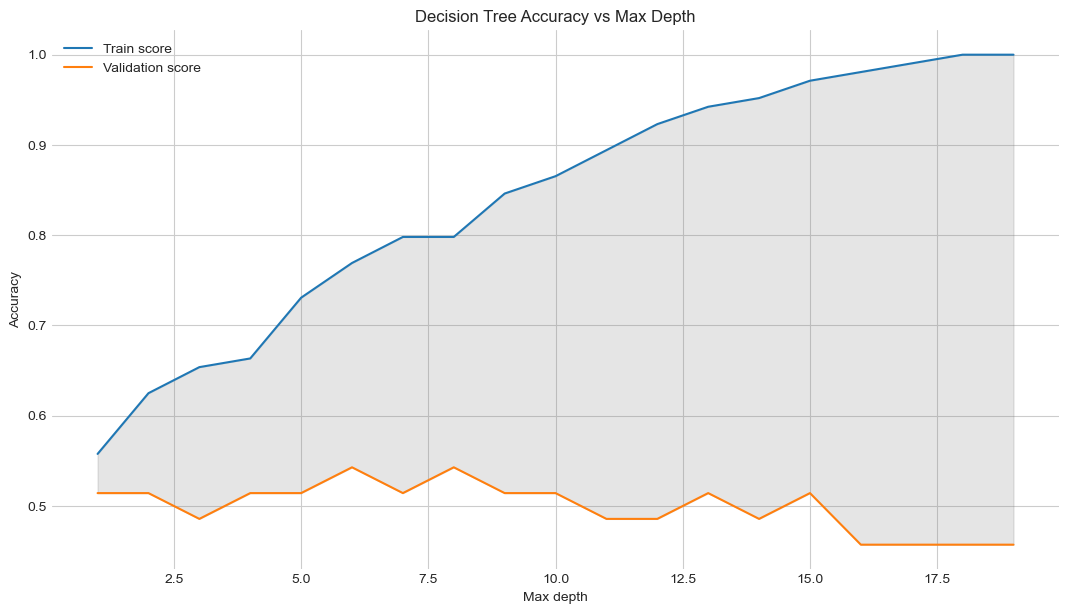

,max_depth,train_acc,val_acc,score_diff
0,1,0.557692,0.514286,0.043407


In [15]:
#run the model
m.decision_tree(X_bow, X_validate_bow, y_train, y_validate)[0:1]

## Random Forest

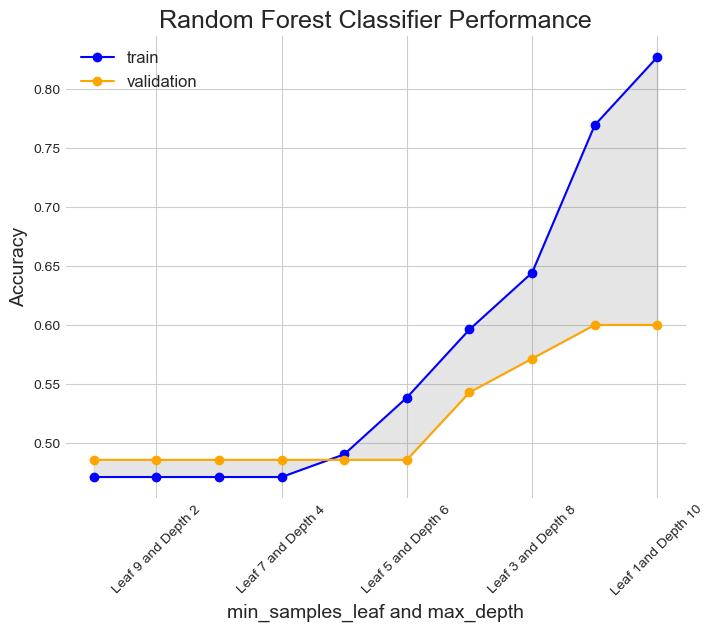

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
5,6,5,0.490385,0.485714,0.00467


In [16]:
# run random forest
m.random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)[5:6]

## KNN

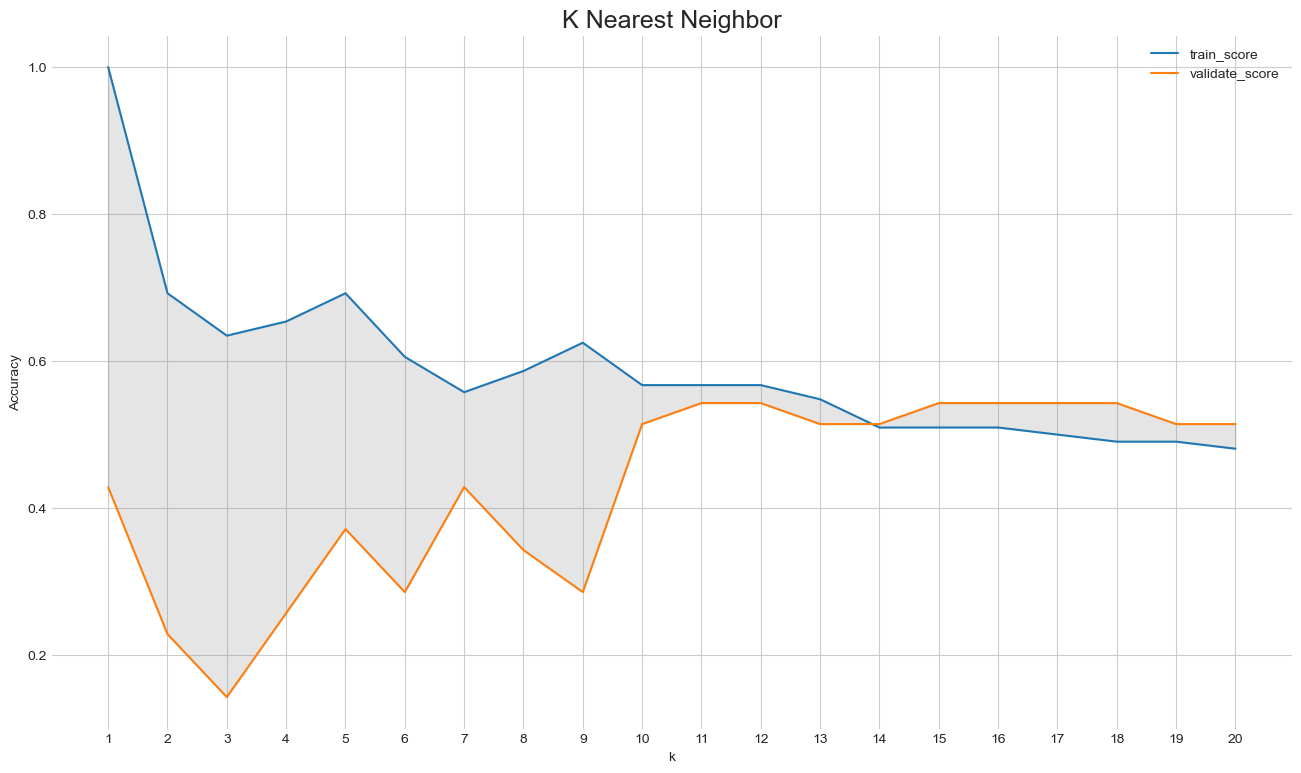

,k,train_score,validate_score,diff_score
12,13,0.548077,0.514286,0.033791


In [17]:
# run knn
m.k_nearest(X_bow, y_train, X_validate_bow, y_validate)[12:13]

# Final Results


- Based on the following summary:

- Baseline accuracy: 0.471

- Decision Tree (max_depth = 1)
    - train: 0.557692
    - validate: 0.514286
    - difference: 0.043407

- Random Forest (min_samples_leaf = 6, max_depth = 5)
    - train: 0.490385		
    - validate: 0.485714
    - difference: 0.00467

- KNN (k = 13)
    - train: 0.548077		
    - validate: 0.514286
    - difference: 0.033791


All models performed better than baseline. Out of the 3 models, Decision tree performed the best in both the train and validate iterations. Therefore, we chose Decision tree as the model of choice for this project. The test data is ran on the model below:

# Run chosen model on test data

In [18]:
# decision tree
m.the_chosen_one(X_bow, X_test_bow, y_train, y_test)

0.5428571428571428

### Insight:
- The test data scored 54% accuracy which is 7% over baseline(47.1%). 

## Model Summary:
- Models Used: Random Forest, Decision Tree, and KNN were employed as models.
- All three models outperformed the baseline.
- The Decision Tree model demonstrated superior performance in both the train and validate iterations.
- The test data achieved an accuracy of 54%, surpassing the baseline by 7%.

# Summary/Takeaways:
- JavaScript 'img', 'bootstrap', 'c' are significantly more prevalent in the language categories compared to other languages.
- Python shows a higher occurrence of 'python' and 'doc' compared to other language categories.
- Java stands out with a significantly higher usage of 'readme' compared to other language categories.
- TypeScript and JavaScript have a notable preference for the word 'code' compared to other language categories.
- HTML shares the most common words with other language categories, indicating a more balanced distribution.
- Java utilizes "dubbo" and "apache" more frequently than the other languages.
- JavaScript has a higher usage of "bootstrap" and "jquery" compared to the other languages.
- TypeScript shows a higher occurrence of "chatgpt" compared to the other languages.
- The ANOVA test results indicate that the word count does not effectively identify language categories, and thus the null       hypothesis cannot be rejected.
- The word cloud looks neat and is fun to make, however, it is very difficult to obtain any useful information from it.
- The Decision Tree model demonstrated superior performance in both the train and validate iterations.
- The test data achieved an accuracy of 54%, surpassing the baseline by 7%.

# Recommendations and Next Steps:
- Our model is recommended for predicting programming languages based on README file content across repositories.
- Further improvements can be made by acquiring more data, exploring different models and hyperparameters.
- Utilizing different features for modeling purposes is also a potential avenue for enhancement.
- Efficient data cleaning and research on tools, frameworks, and libraries associated with each language will provide further exploration opportunities.
- Add programming languages tools and frameworks as a new feature for modeling purposes.